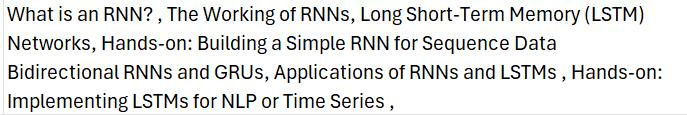

Yeah, I know these are outdated after LSTM and transformers, but...


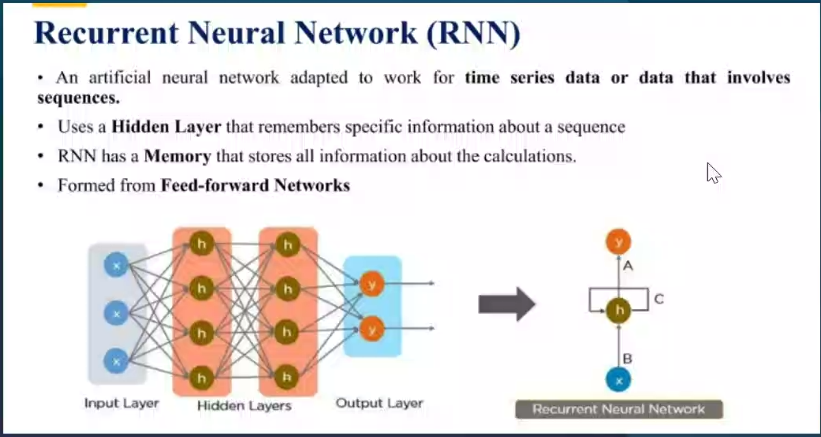

Prakaar

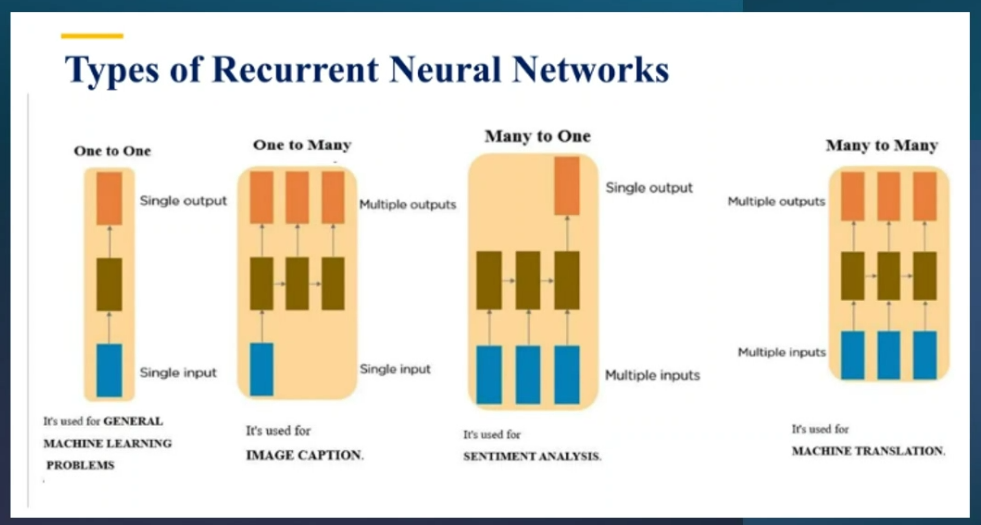

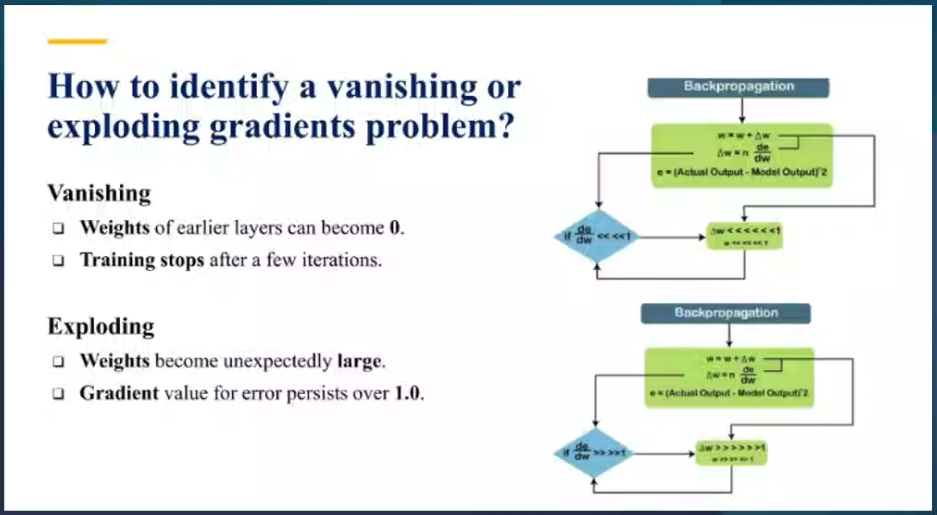

Upar waali Vanishing/Exploding gradient problem ko solve karne ke liye...LSTM🥳

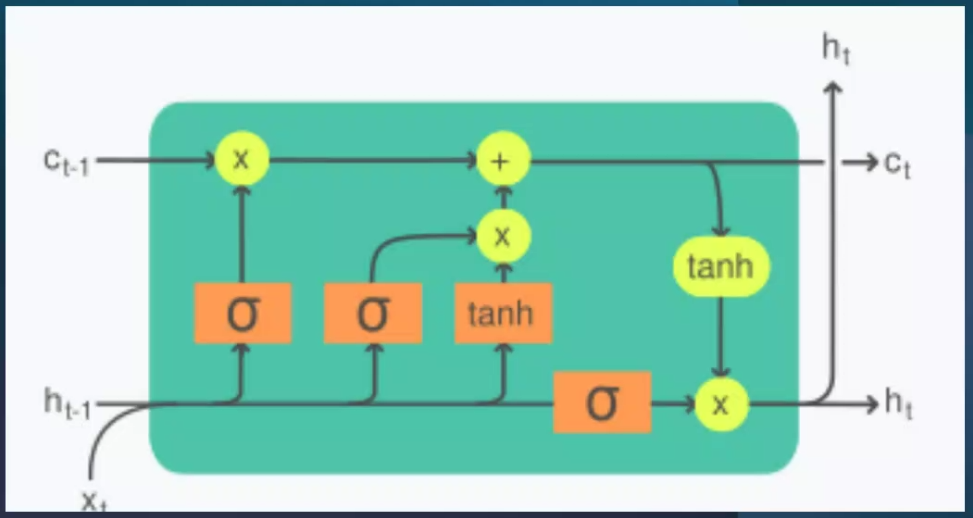

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [12]:
data = pd.read_csv("data/monthly_milk_production.csv")
data.columns = ['Date','Production']
data.head()


,Date,Production
0,1962-01-01 01:00:00,589.0
1,1962-02-01 01:00:00,561.0
2,1962-03-01 01:00:00,640.0
3,1962-04-01 01:00:00,656.0
4,1962-05-01 01:00:00,727.0


In [13]:
data["Date"] = pd.to_datetime(data["Date"])
data.set_index("Date", inplace=True)
production = data["Production"].astype(float).values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(production)

In [14]:
data.head()

,Production
Date,
1962-01-01 01:00:00,589.0
1962-02-01 01:00:00,561.0
1962-03-01 01:00:00,640.0
1962-04-01 01:00:00,656.0
1962-05-01 01:00:00,727.0


In [15]:
window_size = 12
X = []
y = []
target_dates = data.index[window_size:]

for i in range(window_size, len(scaled_data)):
    X.append(scaled_data[i - window_size : i, 0])
    y.append(scaled_data[i, 0])

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test, dates_train, dates_test = train_test_split(
    X, y, target_dates, test_size=0.2, shuffle=False
)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
model = Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=128))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer="adam", loss="mean_squared_error")

In [17]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

rmse = np.sqrt(np.mean((y_test - predictions) ** 2))
print(f"RMSE: {rmse:.2f}")

Epoch 1/100
4/4 [==============================] - 10s 722ms/step - loss: 0.1417 - val_loss: 0.0282
Epoch 2/100
4/4 [==============================] - 0s 67ms/step - loss: 0.0373 - val_loss: 0.0449
Epoch 3/100
4/4 [==============================] - 0s 85ms/step - loss: 0.0288 - val_loss: 0.0565
Epoch 4/100
4/4 [==============================] - 0s 80ms/step - loss: 0.0369 - val_loss: 0.0558
Epoch 5/100
4/4 [==============================] - 0s 68ms/step - loss: 0.0298 - val_loss: 0.0274
Epoch 6/100
4/4 [==============================] - 0s 67ms/step - loss: 0.0323 - val_loss: 0.0291
Epoch 7/100
4/4 [==============================] - 0s 60ms/step - loss: 0.0271 - val_loss: 0.0351
Epoch 8/100
4/4 [==============================] - 0s 55ms/step - loss: 0.0275 - val_loss: 0.0402
Epoch 9/100
4/4 [==============================] - 0s 64ms/step - loss: 0.0263 - val_loss: 0.0279
Epoch 10/100
4/4 [==============================] - 0s 78ms/step - loss: 0.0256 - val_loss: 0.0260
Epoch 11/100
4/4 

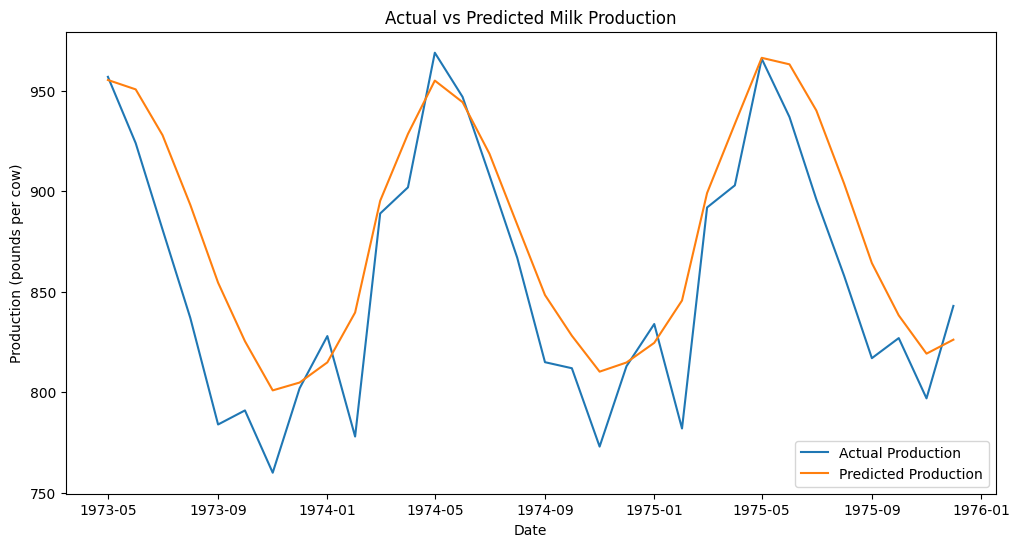

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(dates_test, y_test, label="Actual Production")
plt.plot(dates_test, predictions, label="Predicted Production")
plt.title("Actual vs Predicted Milk Production")
plt.xlabel("Date")
plt.ylabel("Production (pounds per cow)")
plt.legend()
plt.show()

One friend asked in the class 'what if we set *return_sequences=False* '.
Well, lets see..

In [21]:
model2 = Sequential()
model2.add(LSTM(units=128, return_sequences=False, input_shape=(X_train.shape[1], 1)))
model2.add(Dropout(0.2))
model2.add(LSTM(units=128))
model2.add(Dropout(0.2))
model2.add(Dense(1))

model2.compile(optimizer="adam", loss="mean_squared_error")

ValueError: Input 0 of layer "lstm_9" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 128)

🤣🤣 Kuchh toh error de rha hai. hmmm interesting..